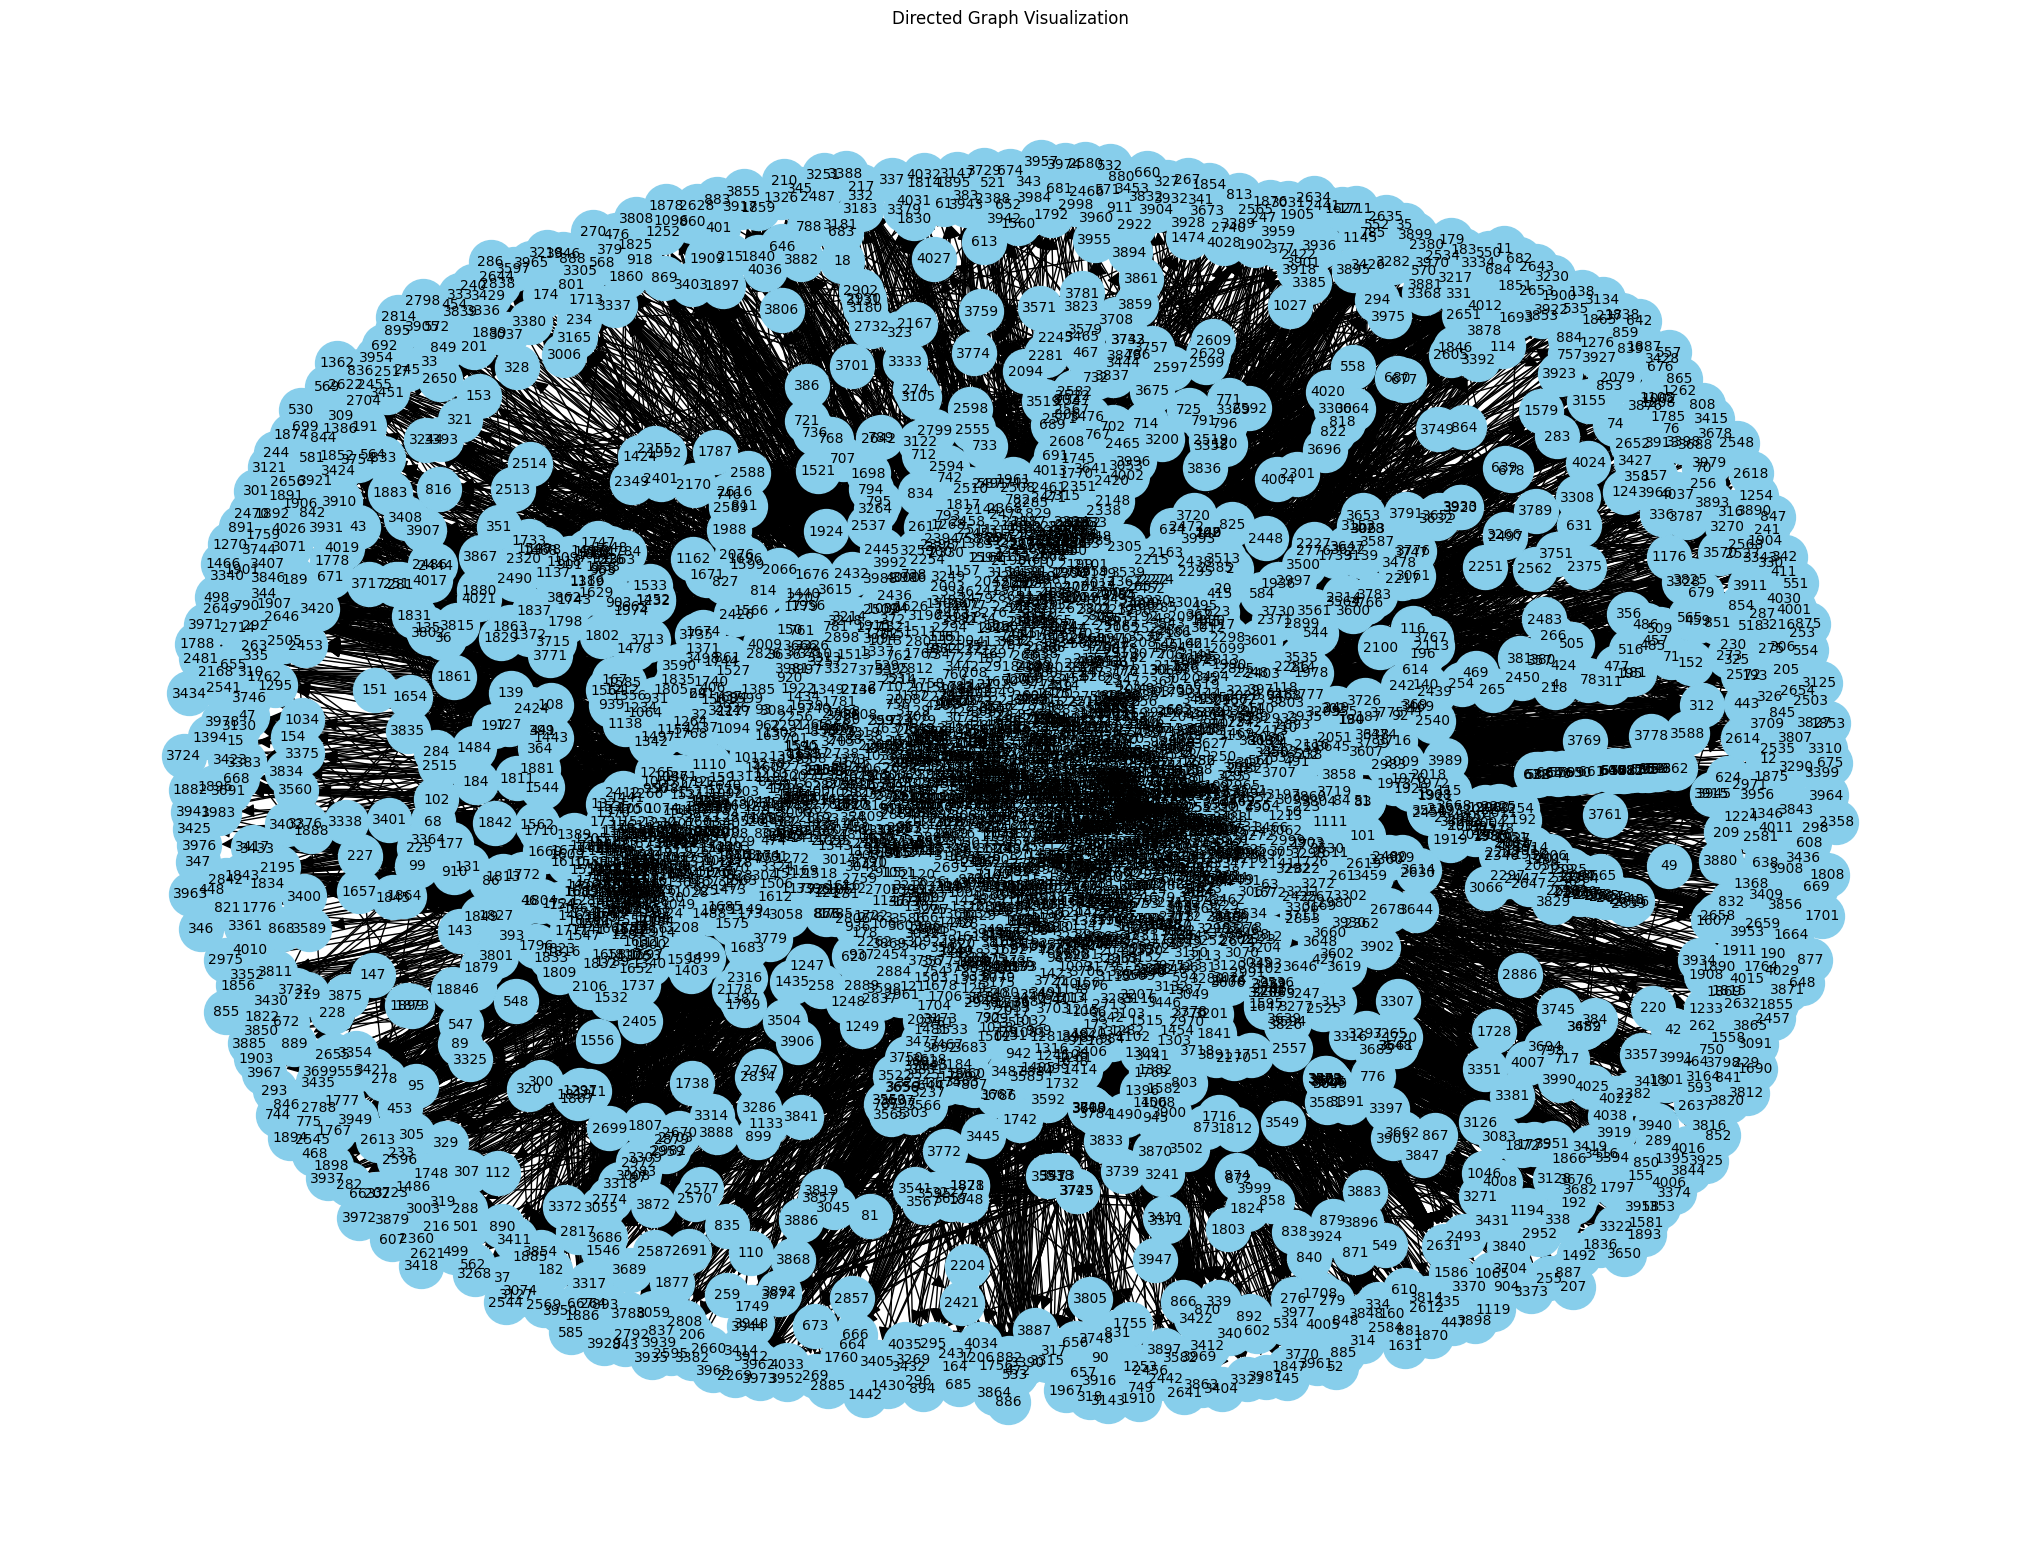

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Read the data from the file
with open("output.txt", "r") as file:
    graph_data = file.readlines()

# Parse the data to extract node connections
graph = {}
for line in graph_data:
    parts = line.split(":")
    node = int(parts[0].split("Node ")[1].strip())  # Extract node number
    if len(parts) > 1:
        connections = list(map(int, parts[1].strip().split(" -> ")[1:]))  # Extract connections and convert to integers
    else:
        connections = []
    graph[node] = connections

# Create a directed graph
G = nx.DiGraph(graph)

# Visualize the graph
plt.figure(figsize=(20, 15))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=10, arrowsize=20)
plt.title("Directed Graph Visualization")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
fb = nx.read_edgelist('facebook_combined.txt', create_using = nx.Graph(), nodetype = int)

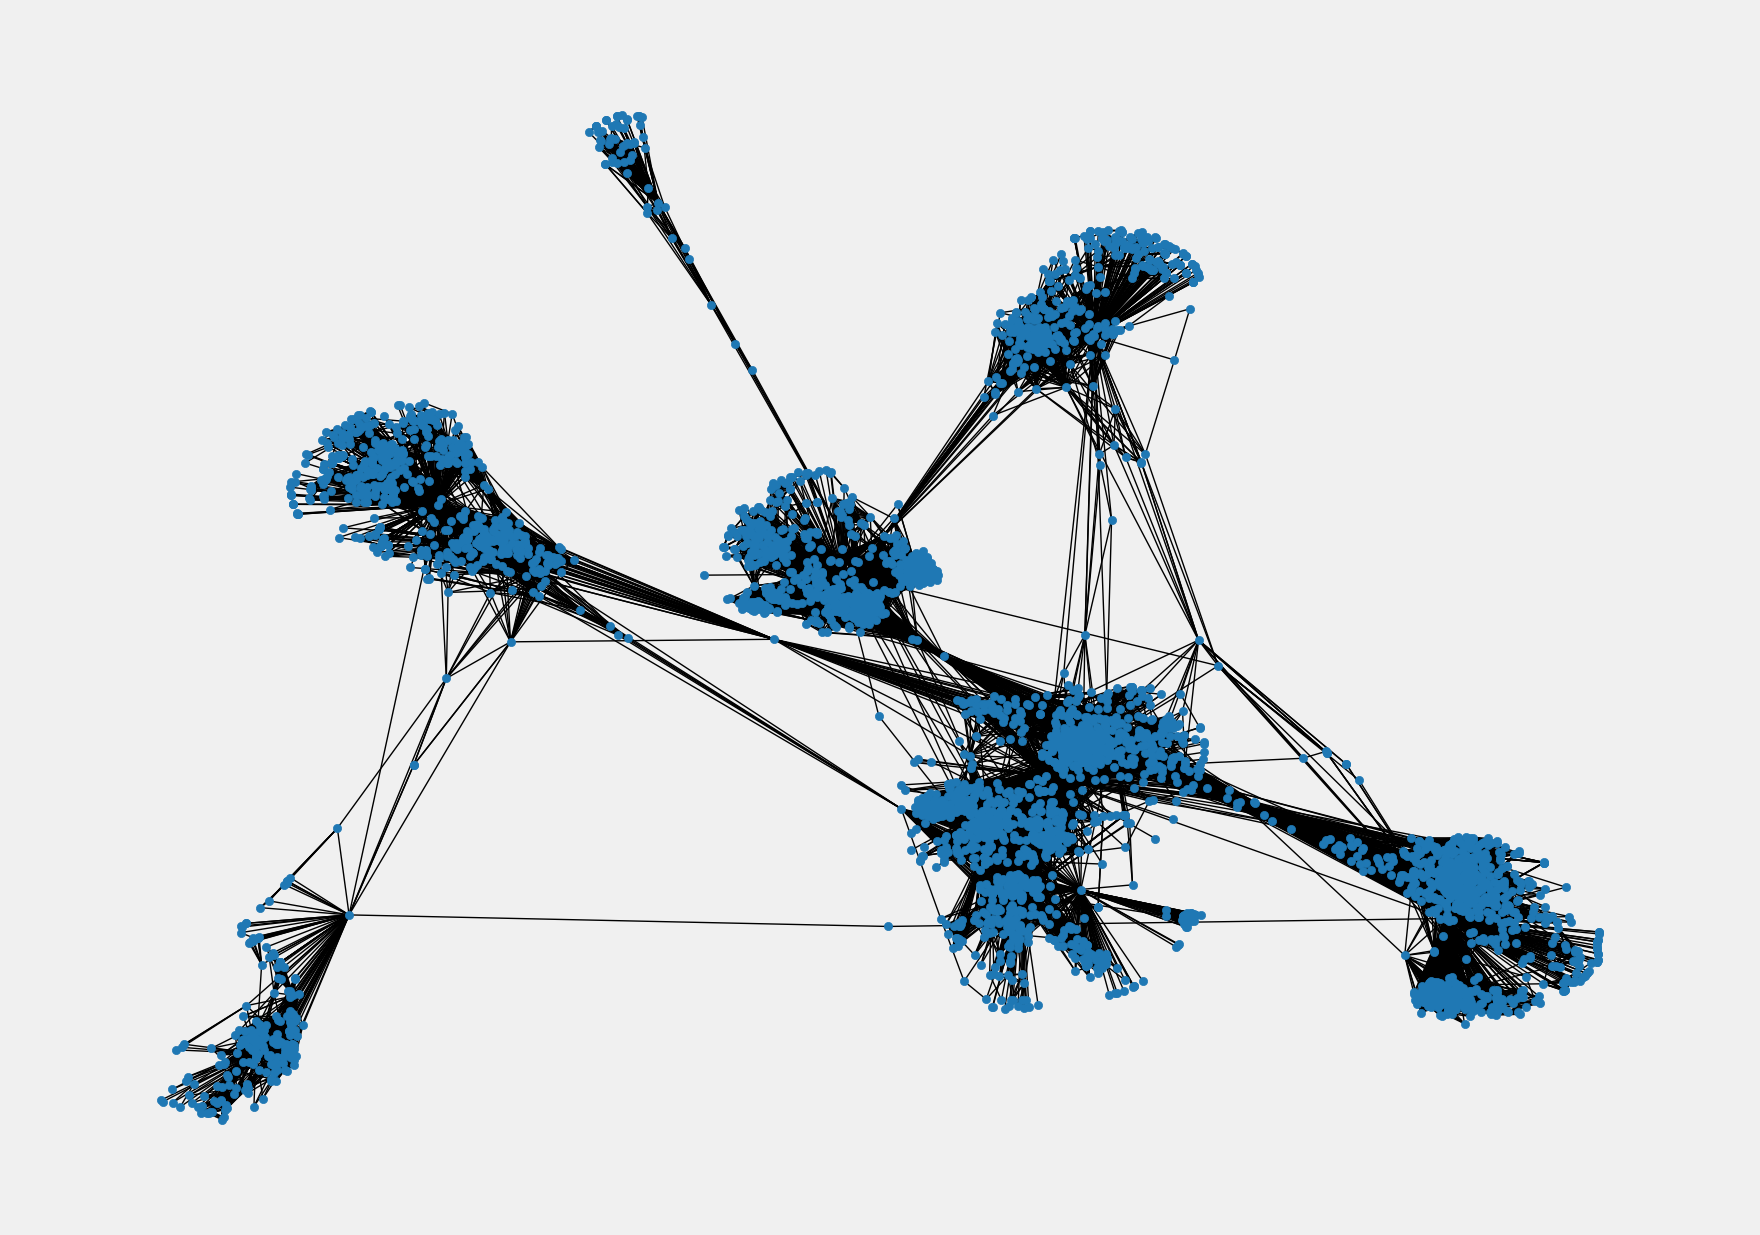

In [ ]:
pos = nx.spring_layout(fb)
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(fb, pos, with_labels = False, node_size = 35)
plt.show()

In [ ]:
pageranks = nx.pagerank(fb)

print(pageranks)

{0: 0.006289602618466542, 1: 0.00023590202311540972, 2: 0.00020310565091694567, 3: 0.00022552359869430614, 4: 0.00023849264701222462, 5: 0.00020234812068977809, 6: 0.00018001867135639642, 7: 0.00026267667111515796, 8: 0.00023737300152657922, 9: 0.0006001572433028075, 10: 0.00013504865958890368, 11: 5.2591423276218314e-05, 12: 5.2591423276218314e-05, 13: 0.0003306419576230765, 14: 0.00028864398034146046, 15: 5.2591423276218314e-05, 16: 0.00013324305769198052, 17: 0.00026000987429524483, 18: 5.2591423276218314e-05, 19: 0.00038064314056362173, 20: 0.00029297537600066995, 21: 0.0006928319433106635, 22: 0.00016385672869526872, 23: 0.0004043263404882842, 24: 0.00022824011209266327, 25: 0.0008004126605197681, 26: 0.0006922746319436038, 27: 9.900477693053426e-05, 28: 0.0002552192093758929, 29: 0.00019154955480122382, 30: 0.0002121964513121638, 31: 0.00029936195818065976, 32: 0.00014788937149430478, 33: 9.172093610965165e-05, 34: 9.248443396698941e-05, 35: 7.353643512923525e-05, 36: 0.000185026

In [ ]:
first_degree_connected_nodes = list(fb.neighbors(3437))
second_degree_connected_nodes = []

In [ ]:
for x in first_degree_connected_nodes:

    second_degree_connected_nodes+=list(fb.neighbors(x))

second_degree_connected_nodes.remove(3437)
second_degree_connected_nodes = list(set(second_degree_connected_nodes))

subgraph_3437 = nx.subgraph(fb, first_degree_connected_nodes + second_degree_connected_nodes)

pos = nx.spring_layout(subgraph_3437)

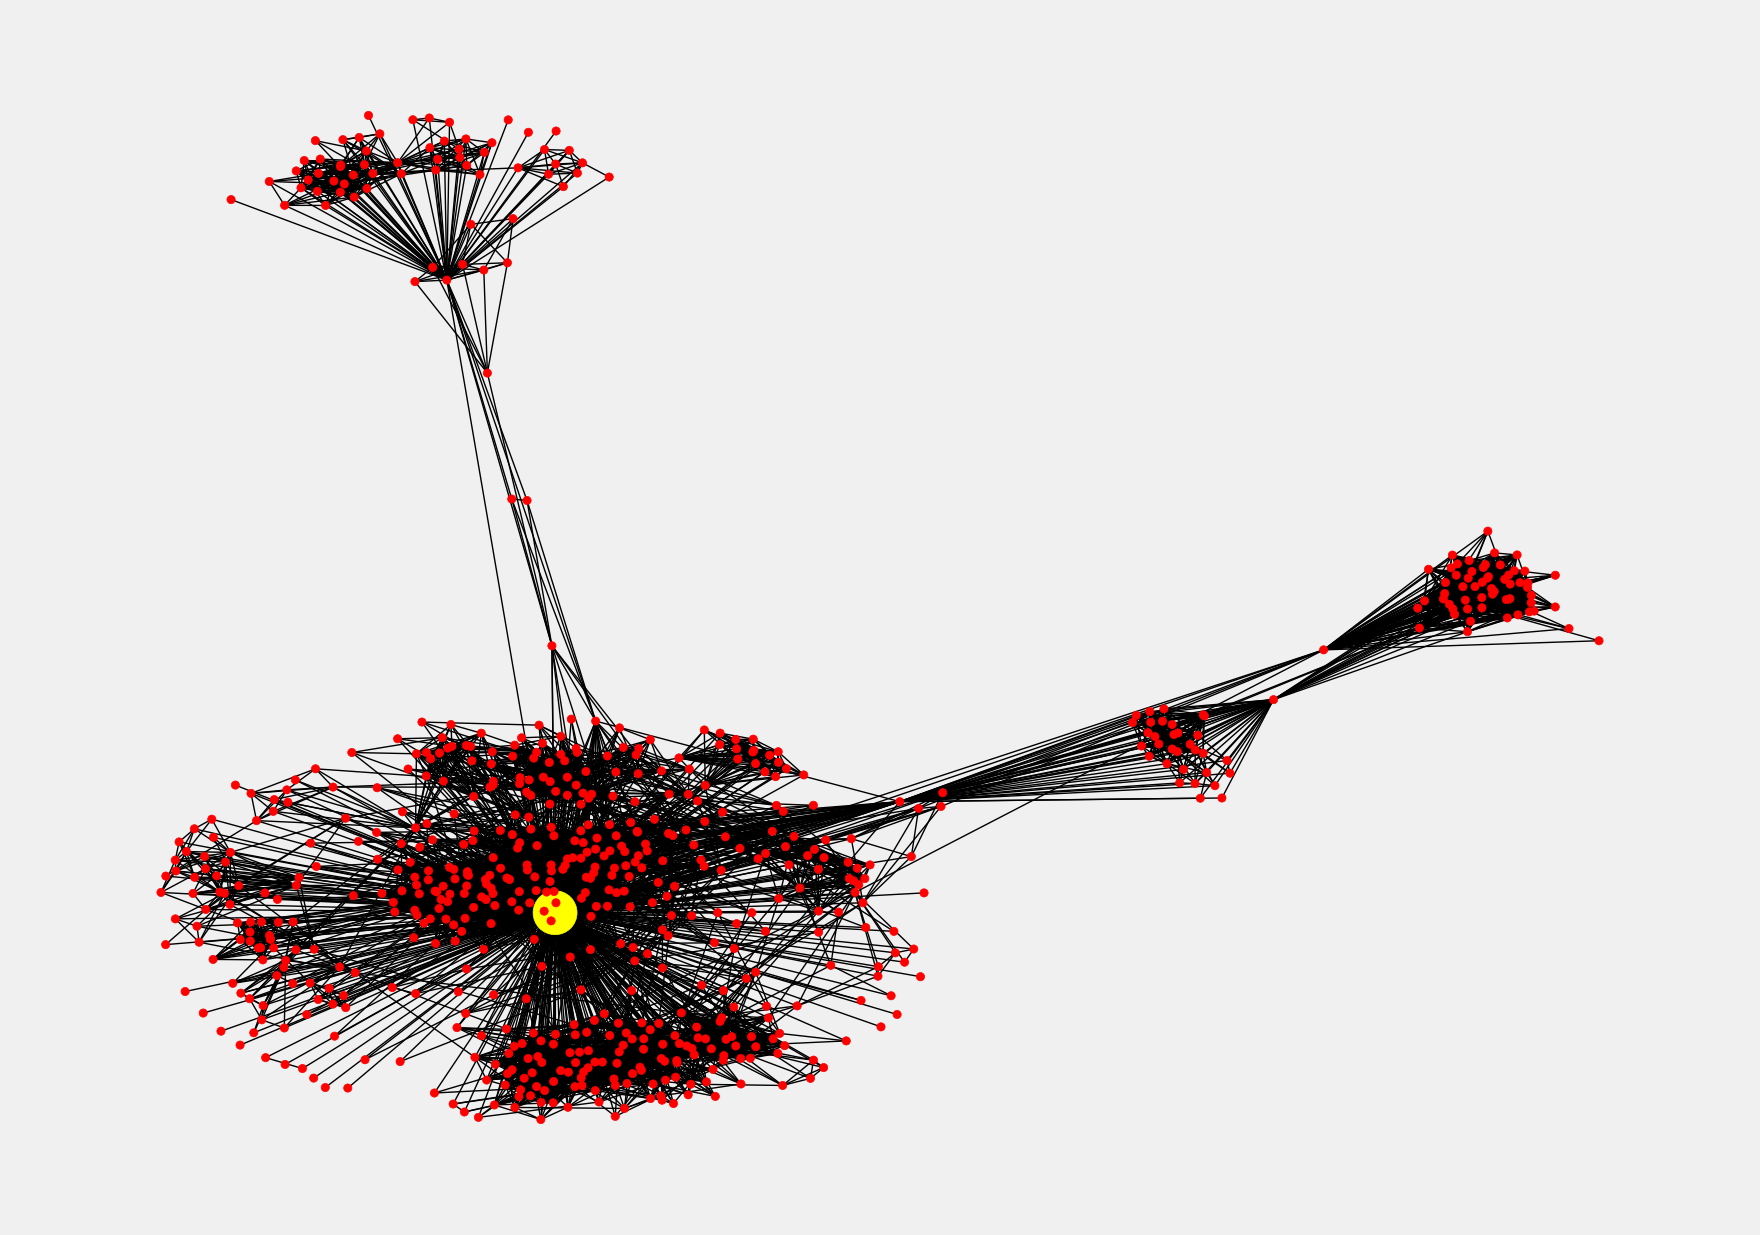

In [ ]:
node_color = ['yellow' if v == 3437 else 'red' for v in subgraph_3437]

node_size = [1000 if v == 3437 else 35 for v in subgraph_3437]

plt.style.use('fivethirtyeight')

plt.rcParams['figure.figsize'] = (20, 15)

plt.axis('off')

nx.draw_networkx(subgraph_3437, pos, with_labels = False, node_color=node_color,node_size=node_size )

plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Function to load the Facebook graph from file
def load_facebook_graph(filename):
    return nx.read_edgelist(filename)

# Function to compute an initial random partition
def compute_initial_partition(graph):
    partition = {}
    nodes = list(graph.nodes())
    random.shuffle(nodes)
    half_len = len(nodes) // 2
    partition.update({node: 0 for node in nodes[:half_len] if node in graph.nodes()})
    partition.update({node: 1 for node in nodes[half_len:] if node in graph.nodes()})
    return partition

# Function to compute the edge cut between partitions
def compute_edge_cut(partition, graph):
    cut = 0
    for node in graph.nodes():
        for neighbor in graph.neighbors(node):
            if partition[node] != partition[neighbor]:
                cut += 1
    return cut // 2  # Divide by 2 since each edge is counted twice

# Function to merge nodes in the graph
def merge_nodes(node, node1, graph):
    if node not in graph.nodes() or node1 not in graph.nodes():
        print("Error: One or both of the nodes to merge do not exist in the graph.")
        return

    if graph.has_node(node) and graph.has_node(node1):
        for neighbor in list(graph.neighbors(node1)):
            if neighbor != node:
                if graph.has_edge(node, neighbor):
                    if 'weight' in graph[node][neighbor]:
                        graph[node][neighbor]['weight'] += graph[node1][neighbor].get('weight', 1)
                    else:
                        graph[node][neighbor]['weight'] = graph[node1][neighbor].get('weight', 1)
                else:
                    graph.add_edge(node, neighbor, weight=graph[node1][neighbor].get('weight', 1))
            graph.remove_edge(node1, neighbor)

        graph.remove_node(node1)

        for neighbor in list(graph.neighbors(node1)):
            if neighbor != node:
                if graph.has_edge(node, neighbor):
                    if 'weight' in graph[node][neighbor]:
                        graph[node][neighbor]['weight'] += graph[node1][neighbor].get('weight', 1)
                    else:
                        graph[node][neighbor]['weight'] = graph[node1][neighbor].get('weight', 1)
                else:
                    graph.add_edge(node, neighbor, weight=graph[node1][neighbor].get('weight', 1))

        partition.remove(node1)
    else:
        print(f"Error: One or both of the nodes {node} and {node1} do not exist in the graph.")

# Function to coarsen partitions by merging nodes
def coarsen_partitions(partition, graph):
    for node in partition:
        max_weight = float('-inf')
        best_node1 = None
        for node1 in partition:
            if node1 != node and graph.has_edge(node, node1):
                weight = graph[node][node1].get('weight', 1)
                if weight > max_weight:
                    max_weight = weight
                    best_node1 = node1
        if best_node1:
            merge_nodes(node, best_node1, graph)

# Function to perform the Kernighan-Lin algorithm
def KL_algorithm(graph, partition, max_iter=100):
    for _ in range(max_iter):
        initial_cut = compute_edge_cut(partition, graph)
        coarsen_partitions(partition, graph)
        final_cut = compute_edge_cut(partition, graph)
        if final_cut >= initial_cut:
            break
    return partition

# Function to visualize the resulting partitions
def visualize_partitions(graph, partition):
    pos = nx.spring_layout(graph)
    colors = ['r', 'b']
    node_colors = [colors[partition[node]] for node in graph.nodes()]
    nx.draw(graph, pos, node_color=node_colors, with_labels=True)
    plt.show()

if __name__ == "__main__":
    # Load the Facebook graph
    graph = load_facebook_graph("facebook_combined.txt")

    # Compute initial random partition
    partition = compute_initial_partition(graph)
    partition = {node: partition[node] for node in partition if node in graph.nodes()}
    # Perform the Kernighan-Lin algorithm
    partition = KL_algorithm(graph, partition)

    # Visualize the partitions
    visualize_partitions(graph, partition)


NetworkXError: The node 107 is not in the graph.

<ipython-input-2-80d450a5cb8c>:42: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  u, v = random.sample(partition.keys(), 2)


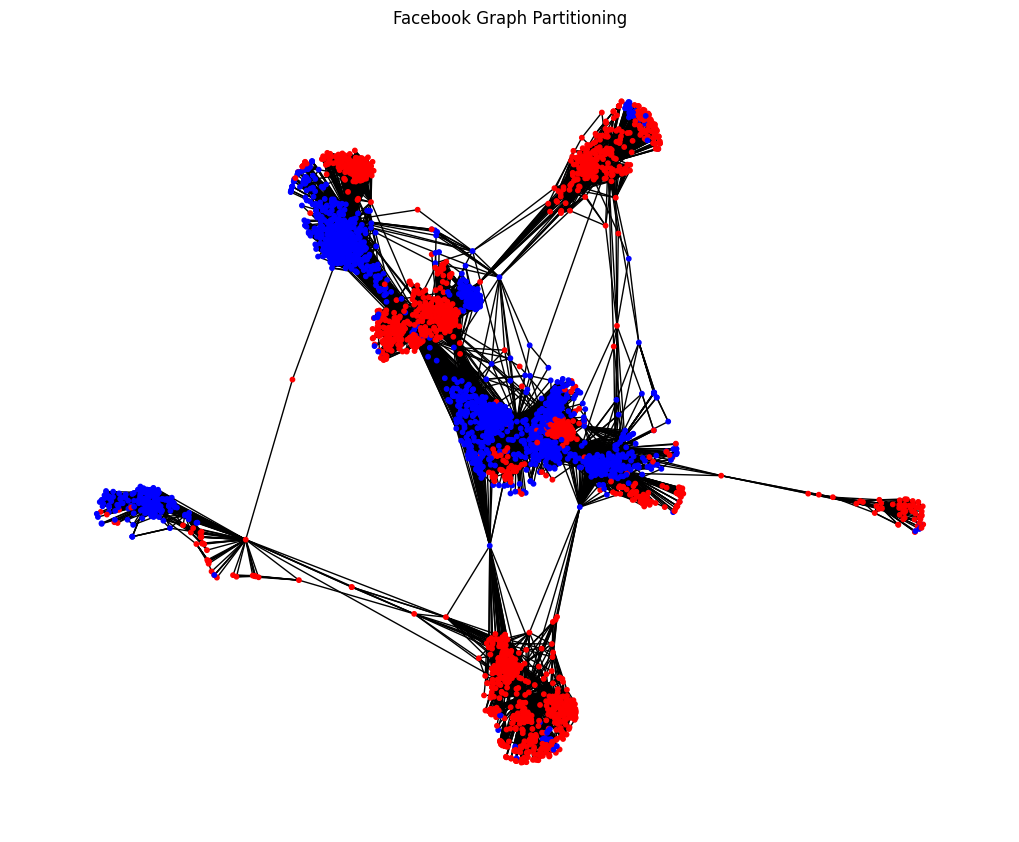

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Function to load the graph from adjacency list
def load_graph(filename):
    G = nx.Graph()
    with open(filename, 'r') as file:
        for line in file:
            nodes = line.strip().split()
            node = nodes[0]
            neighbors = nodes[1:]
            for neighbor in neighbors:
                G.add_edge(node, neighbor)
    return G

# Function to compute an initial random partition
def compute_initial_partition(graph):
    partition = {}
    nodes = list(graph.nodes())
    random.shuffle(nodes)
    half_len = len(nodes) // 2
    partition.update({node: 0 for node in nodes[:half_len]})
    partition.update({node: 1 for node in nodes[half_len:]})
    return partition

# Function to compute the edge cut between partitions
def compute_edge_cut(partition, graph):
    cut = 0
    for node in graph.nodes():
        for neighbor in graph.neighbors(node):
            if partition[node] != partition[neighbor]:
                cut += 1
    return cut // 2  # Divide by 2 since each edge is counted twice

# Function to perform the Kernighan-Lin algorithm
def KL_algorithm(graph, partition, max_iter=100):
    for _ in range(max_iter):
        initial_cut = compute_edge_cut(partition, graph)
        improve = False
        for _ in range(len(graph)//2):  # Perform swaps equal to half the number of nodes
            u, v = random.sample(partition.keys(), 2)
            u_community, v_community = partition[u], partition[v]
            delta_cut = 0
            for neighbor in graph.neighbors(u):
                if partition[neighbor] != u_community:
                    delta_cut -= 1
                else:
                    delta_cut += 1
            for neighbor in graph.neighbors(v):
                if partition[neighbor] != v_community:
                    delta_cut -= 1
                else:
                    delta_cut += 1
            if delta_cut < 0:
                partition[u], partition[v] = v_community, u_community
                improve = True
        if not improve:
            break
    return partition

# Function to save the partitions to a text file
def save_partitions(partition, filename):
    with open(filename, 'w') as file:
        for node, community in partition.items():
            file.write(f"{node} {community}\n")

# Load the graph
graph = load_graph("facebook_combined.txt")

# Compute initial random partition
partition = compute_initial_partition(graph)

# Perform the Kernighan-Lin algorithm
partition = KL_algorithm(graph, partition)

# Save the partitions to a text file
save_partitions(partition, "facebook_partitions.txt")

# Visualize the partitions
pos = nx.spring_layout(graph)
colors = ['r', 'b']
node_colors = [colors[partition[node]] for node in graph.nodes()]
plt.figure(figsize=(10, 8))
nx.draw(graph, pos, node_color=node_colors, with_labels=False, node_size=10)
plt.title("Facebook Graph Partitioning")
plt.show()


In [5]:
def calculate_efficiency(partition, graph):
    intra_community_edges = 0
    total_possible_intra_community_edges = 0

    for node in graph.nodes():
        for neighbor in graph.neighbors(node):
            if partition[node] == partition[neighbor]:
                intra_community_edges += 1
        total_possible_intra_community_edges += len(list(graph.neighbors(node))) - 1

    efficiency = intra_community_edges / total_possible_intra_community_edges
    return efficiency

# Calculate efficiency of the partition
efficiency = calculate_efficiency(partition, graph)
print("Efficiency of the partition:", efficiency)


Efficiency of the partition: 0.9939279355560839


In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import time

# Function to load the graph from the adjacency list
def load_graph(filename):
    G = nx.Graph()
    with open(filename, 'r') as file:
        for line in file:
            nodes = line.strip().split()
            node = nodes[0]
            neighbors = nodes[1:]
            for neighbor in neighbors:
                G.add_edge(node, neighbor)
    return G

# Function to compute an initial random partition
def compute_initial_partition(graph):
    partition = {}
    nodes = list(graph.nodes())
    random.shuffle(nodes)
    half_len = len(nodes) // 2
    partition.update({node: 0 for node in nodes[:half_len]})
    partition.update({node: 1 for node in nodes[half_len:]})
    return partition

# Function to perform the Kernighan-Lin algorithm
def kernighan_lin(graph, partition, max_iter=100):
    for _ in range(max_iter):
        initial_cut = compute_edge_cut(partition, graph)
        improve = False
        for _ in range(len(graph)//2):  # Perform swaps equal to half the number of nodes
            u, v = random.sample(partition.keys(), 2)
            u_community, v_community = partition[u], partition[v]
            delta_cut = 0
            for neighbor in graph.neighbors(u):
                if partition[neighbor] != u_community:
                    delta_cut -= 1
                else:
                    delta_cut += 1
            for neighbor in graph.neighbors(v):
                if partition[neighbor] != v_community:
                    delta_cut -= 1
                else:
                    delta_cut += 1
            if delta_cut < 0:
                partition[u], partition[v] = v_community, u_community
                improve = True
        if not improve:
            break
    return partition

# Function to compute the edge cut between partitions
def compute_edge_cut(partition, graph):
    cut = 0
    for node in graph.nodes():
        for neighbor in graph.neighbors(node):
            if partition[node] != partition[neighbor]:
                cut += 1
    return cut // 2  # Divide by 2 since each edge is counted twice

# Function to measure the execution time of the Kernighan-Lin algorithm
def measure_execution_time(graph):
    start_time = time.time()
    partition = compute_initial_partition(graph)
    final_partition = kernighan_lin(graph, partition)
    end_time = time.time()
    return end_time - start_time

# Load the Facebook graph
graph = load_graph("facebook_combined.txt")

# Define a range of graph sizes
max_nodes = graph.number_of_nodes()
graph_sizes = list(range(100, max_nodes + 1, 100))

# Measure the execution time for each graph size
execution_times = []
for size in graph_sizes:
    subgraph = graph.subgraph(list(graph.nodes())[:size])
    execution_time = measure_execution_time(subgraph)
    execution_times.append(execution_time)

# Plot the time complexity graph
plt.plot(graph_sizes, execution_times, marker='o')
plt.xlabel('Graph Size (Number of Nodes)')
plt.ylabel('Execution Time (Seconds)')
plt.title('Time Complexity of Kernighan-Lin Algorithm')
plt.grid(True)
plt.show()


<ipython-input-4-ce3a92c3f46b>:34: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  u, v = random.sample(partition.keys(), 2)


KeyboardInterrupt: 